# ENSE 471 - Winter 2018 - Lab 2

## FFMPEG Frontend - Phase 1

The purpose of this lab is to introduce the students to the concepts required to implement the FFMPEG frontend, including downloading FFMPEG for their target platform, downloading a video, creating and invoking a command line argument, invoking a shell command through python, and constructing a simple interface in Kivy to simplify this process. 


## Part 1: Acquiring FFMPEG

FFMPEG is an open source software suite for displaying, streaming, transcoding and recording video and audio content. To begin, we must download and extract (or build) FFMPEG for our target platform. 

Browse to the FFMPEG website: https://www.ffmpeg.org/

Click on download, and select your target operating system. It is recommended that you download a static build - that is, a complete compilation of the software which uses staticly linked libraries in the executable rather than dynamically linked libraries - this will make your life easier, even though the executable will be a little bit bigger.  Because FFMPEG is an open source project, the builds will be hosted on a number of third-party mirror websites. You will typically want to install an x64 / 64 bit variant, unless you are using a legacy or specialized system which does not support 64 bit operations (Pre 2012 machine, certain tablets, etc.) Be sure to install an official build, not one of the lastest development nightlies, as core files may be missing in the nightly builds which are largely incremental in nature.

Once you have FFMPEG downloaded, unzip the package and find the FFMPEG executable:

Store the path to your FFMPEG as a string `ffmpegPath` in the following block. Exclude the application name in this path:

In [1]:
ffmpegPath = "C:\\Users\\bast200q\\Jupyter\\ffmpeg-20180126-18e2ac0-win64-static_zip\\ffmpeg-20180126-18e2ac0-win64-static\\bin"

Ensure that the extracted directory includes the following executables:
- ffmpeg
- ffplay

Some builds omit ffplay to reduce the file size. If the build you downloaded does not include it you can manually download it from the following directory:
- ffplay (win) <ADAM: find directory>
- ffplay (linux) <ADAM: find directory>
- ffplay (mac) <ADAM: find directory>

## Part 2: Download a test Video

For the test video for this course, we will use Big Buck Bunny, an Open-Source 3D CG Animation film made in Blender. You can read more about it here:

https://en.wikipedia.org/wiki/Big_Buck_Bunny

and download the video here:

http://distribution.bbb3d.renderfarming.net/video/mp4/bbb_sunflower_1080p_30fps_normal.mp4

This is a 2D, 1080p, 30FPS variant. There are higher resolution, stereoscopic and anaglyph 3D variants available as well, but this variant will be the most useful for our purposes and hardware.

Once you have successfully downloaded the video and saved it somewhere, put the complete path to the video as a string named `video` here:

In [2]:
video = "C:\\Users\\bast200q\\Jupyter\\bbb_sunflower_1080p_30fps_normal.mp4"

## Part 3: Understanding Command Line Arguments

In this lab we will be invoking command line applications from python. First we must understand how command line applications and arguments work.

Command Line applications are typically run from the terminal. If you have ever used a UNIX-like operating system such as linux, you are likely already familiar with command line applications and arguments. Some linux commands you may have seen include:

`cd <directory>`

`mkdir <directory>`

`rm <file>`

In a command line application, the first word typed is the command. This is the name of the application which is to be run. After this there is a space and then the command line arguments. While the implementation of these arguments is ultimately at the discretion of the application developer, a typical pattern of named/optional arguments which arises is:

`command_name -arg1_name arg1_value -arg2_name arg2_value ... -argN_name argN_value`

That is, the name of the optional arguments are preceded by a dash, and the then the value for that argument is given after a space.

Some programs also have positional arguments, which are not typically specified by a name, but simply require the value to be passed in to the command in a certain position, eg. in ffmpeg, the output file is a required (positional) argument and is always given as the last command in the command list.

Generally speaking the order of the named (optional) arguments do not matter, and in many cases may be omitted. The positional arguments are required and must be always be included. FFMPEG is different, in that optional filter commands should be specified first, and encoding commands should be specified later.

We'll explore and run some of these commands in the next portions of this notebook.

## Part 4: Running a Shell Command from Python

In this part of the lab we will check to see if the video and application downloads worked properly by playing the video in `ffplay`, one of the applications included in `ffmpeg` which plays videos using the SDL library.

We will use the python `call` command which invokes a subprocess. We can see this process running in the terminal windows which spawned Jupyter Notebook. To use this command, each of the command line arguments, which would regularly be separated by spaces, must be stored as individual elements in a python list of strings.

Example: To run "ls -l", we would need the following list:

`["ls", "-l"]`

And pass this list as an argument to the call function.

One advantage of the call function is that we do not need to worry about manually escaping spaces in the python arguments, should any arise, which is common during paths and directories. 

First we need to check the command and argument structure of ffplay to play a video. We can find this here:

https://ffmpeg.org/ffplay.html

We can see that this 

"path to ffmpeg/ffplay" "path to video"

since we've already stored the path to ffmpeg and the path to the video, we can quickly generate this command using some list and string operations. Do this in the following cell:

In [3]:
playCommand = [ffmpegPath + "\\ffplay", video];
print(playCommand);

['C:\\Users\\bast200q\\Jupyter\\ffmpeg-20180126-18e2ac0-win64-static_zip\\ffmpeg-20180126-18e2ac0-win64-static\\bin\\ffplay', 'C:\\Users\\bast200q\\Jupyter\\bbb_sunflower_1080p_30fps_normal.mp4']


Verify that your command looks somewhat similar to the following, although paths may be different:

`["/home/adam/Downloads/ffmpeg-3.4.1-64bit-static/ffplay", "/media/adam/E0E05EBBE05E979C/bbb_sunflower_1080p_60fps_normal.mp4"]`

Now, we need to invoke this command from the python command line. We can use the following command


In [4]:
from subprocess import call
call(playCommand)

0

Upon running this command, we should see the video play in FFPLAY. We can now close it. 

Hopefully, you now understand and can appreciate some of the struggles involved in running command line applications, even when just performing simple tasks like playing videos. We will now start on the process of creating a GUI to play videos using ffplay, as well as encode them (change the video format) using ffmpeg.

## Part 5: GUI Basics

Before designing the GUI, we must first analyze the requirements for this applications. They are: 

The application will have the following functionality:
- the user will enter the file directory
- the user will enter the output file directory and name
- the user will then select one of three profiles from the settings
    - the user may then press "preview" which will play the original, unmodified video.
    - or the user may press the "play" button which will begin the encoding process.

Before building our GUI, it's a good idea first to have an idea what we want our interface to look like. To keep all of the submissions on the same page, let's aim to implement the following design:

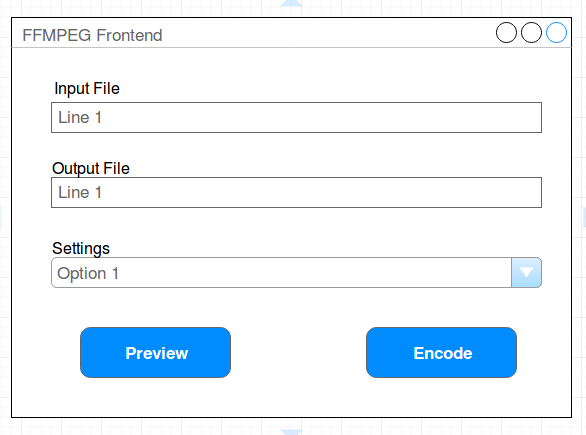

Before we can begin to implement this functionality, we must first further analyze the design, and select appropriate layouts, widgets and properties. 

## Choosing a Layout and Objects

The first consideration in implementing an interface will be to consider the layout choices. In class we talked about a method for converting an interface mockup to a widget hierarchy tree. The first phase of this analysis involves grouping similar elements and boxing them together with dotted lines. If we follow through the analysis done in class, we can group together the interface elements into similarly sized blocks using the following analysis.

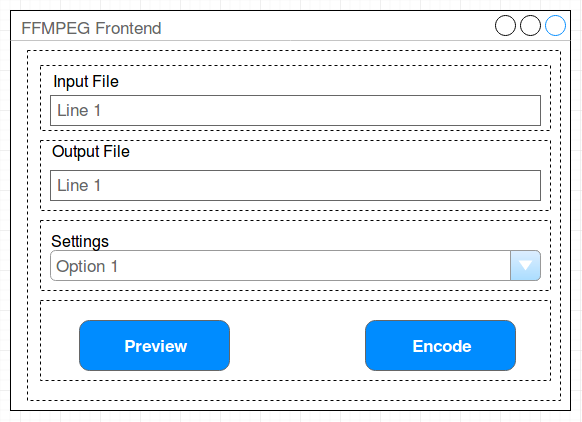

Consider which type of layout would work the best for each of these groups, which layout type should be used to nest all the other layouts, and which types of components to use. Hint: The Spinner type is recommended for one of the components. 

On a piece of scrap paper, draw the element hierarchy, decide on the types and required properties for the objects in this interface. This will help you generate the code for this interface.

Before we can put the interface all together though, let's first create the functionality for the two buttons.

## Part 6: Impelemnting the preview function:

In order to give functionality to our buttons, we must write functions to complete the actions. The purpose of the preview function is to play the input video without encoding it first. We've already seen how we can do this in Part 3 of the notebook. Write a function that can perform this action on an arbitrary file in the following code cell: 

In [5]:
# play function here
def play(pathName):
    from subprocess import call
    preview = [ffmpegPath + "\\ffplay", pathName]
    call(preview)

Run the function in the function in the cell below and confirm that it works. You may then call this function from the application, or reuse the code in the event handler in your GUI code.

In [6]:
#play (video)
play(video)

## Part 7: Implementing the encode function:

Implementing the encode function is a bit more complicated, because ffmpeg has a number of different options which we will have to select from depending on the settings the user has selected. First, let us select 3 profiles which the user may select from in our interface:

Profile 1: HD
- 720p video resolution. (1280 x 720)
- Framerate: 30 fps
- x264 video - CRF = 20
- MP3 audio - Q = 2


Profile 2: SD
- 480p video. (852 x 480)
- Framerate: 24 fps
- x264 video - CRF = 24
- MP3 audio - Q = 5


Profile 3: 360p
- 360p video. (640 x 360)
- Framerate: 24 fps 
- x264 video - CRF = 30
- MP3 audio - Q = 5

We will need to create each of these using a command line expression in ffmpeg.
A brief overview of some of the arguments needed in ffmpeg are provided below

|argument | arg type | name | value type | value example |
|--|--|--|--|--|
| -i | optional | input file | string | input.mp4 |
| -r | optional | framerate | number | 60 |
| -s | optional | video scale | number x number | 1920x1080 |
| -c:v | optional | video codec | string | libx265 |
| -crf | optional | video constant rate factor | number | 20 |
| -c:a | optional | audio codec | string | libfdk_aac |
| -q:a | optional | audio quality | number | 5 |
| LAST | positional | output file | string | output.mp4 | 


In the cell below, come up with a sample call for each of three profiles which was specified above as a single string. For now use the following placeholder values:

ffmpeg: `"ffmpeg"`

input: `"input.mp4"`

output: `"output.mp4"` 

An example ffmpeg call for 1080p resolution, 60 fps, x265 Video @ crf = 20 and AAC audio is given below:

`ffmpeg -i input.mp4 -r 60 -s 1920x1080 -c:v libx265 -crf 20 -c:a libfdk_aac -q:a 5 output.mp4`

You may need to browse the ffmpeg documentation to see an explanation of the different encoder names and  values and explanations of different options such as video quality, audio quality, differenct encoder/decoders (codecs), etc.

In [7]:
highProfile = "-i input.mp4 -r 30 -s 1280x720 -c:v libx264 -crf 20 -c:a libmp3lame -q:a 2 output.mp4"
medProfile = "-i input.mp4 -r 24 -s 852x480 -c:v libx264 -crf 24 -c:a libmp3lame -q:a 5 output.mp4"
lowProfile = "-i input.mp4 -r 24 -s 640x360 -c:v libx264 -crf 30 -c:a libmp3lame -q:a 5 output.mp4"

Recall that when we are using the "call" subprocess function, we must split each word into a string in a list. This can be accomplished using the "split" command. Split these in the following block:

In [8]:
highProfileParamList = highProfile.split(" ")
medProfileParamList = medProfile.split(" ")
lowProfileParamList = lowProfile.split(" ")

Note that in the final implementation, we will need to replace the 3 placeholder entries into the list (ffmpeg, input_file, output_file) with the correct data from the textbox. This can be done by setting the appropriate elements in the list by index. Make note of the indeces of each of these variables. 

If is finally time to write a function to perform encoding. Write a function which takes the following arguments: 
a profile name (string),
the input file (string),
the output file (string). 

Inside the function, use a branching selection to choose which profile to use based on the profile name, and replace the appropriate placeholder varaibles with the different arguments and stored values (rembember to include the full path to FFMPEG), and finally call the function. You can use the global keyword to access the previously created profile parameter lists.

In [9]:
# write your encode function definition here
def encode(profileName, inputFile, outputFile):
    #Get the appropriate command based on the selected encoding
    parameters = [ffmpegPath + "\\ffmpeg"]
    profileLookup = {"HD": highProfileParamList, "SD": medProfileParamList, "360p": lowProfileParamList}
    parameters += profileLookup[profileName]

    #Set the input and output files
    parameters[2] = inputFile
    parameters[15] = outputFile
    print(parameters)
    
    from subprocess import call
    #Call the video encoder
    call(parameters)
    
    #Play the newly encoded video
    play(outputFile)

**Save your notebook now**, then run the function in the cell below:

In [10]:
# write your encode function call here
test = "C:\\Users\\bast200q\\Jupyter\\HDOutput.mp4"
encode("HD", video, test)

['C:\\Users\\bast200q\\Jupyter\\ffmpeg-20180126-18e2ac0-win64-static_zip\\ffmpeg-20180126-18e2ac0-win64-static\\bin\\ffmpeg', '-i', 'C:\\Users\\bast200q\\Jupyter\\bbb_sunflower_1080p_30fps_normal.mp4', '-r', '30', '-s', '1280x720', '-c:v', 'libx264', '-crf', '20', '-c:a', 'libmp3lame', '-q:a', '2', 'C:\\Users\\bast200q\\Jupyter\\HDOutput.mp4']


If the function worked correctly, you will see the FFMPEG program running in the terminal instance which launched Jupyter Notebook. Depending on the settings you have selected, this process may take a while. You can cancel this process by interrupting the kernel from within Jupyter Notebook. You will need to restart the kernel and run it to this portion of the notebook so that temporary variables you have set are restored. 

## Part 8: Implementing the GUI

It is now time to implement the GUI. There are two portions of Kivy applications, a python portion in which we invoke commands, and a ".kv" (kivy) file which specifies layout. The kv file is a plain text file which specifies the layout of the page in a manner similar to XML or HTML, but has a syntax more similar to Python, and can actually run snippets of python code.

Since we have already created a widget tree, we can begin implementing this in the Kivy language. You can get a good overview of the Kivy language here:

https://kivy.org/docs/api-kivy.lang.html

Some steps you might want to follow:
- Identify which layouts you will need
    - add the layouts to the KV file with the proper nesting
        - set any properties of the layouts as needed
- Identify which widgets you will need
    - add the widgets to the KV file with the proper netsting
        - set any properties of the layouts as needed
- Identify which elements require events
    - in the python file, write code for these events
        - in the Kivy file, ensure that functions are called from the right side of the "on" events. 

It may also be useful to reference the Kivy example done in class on Thursday, Jan 18.

In the cell below we will implement the KV file. We will do this in a string instead of in a separate file so that we can keep all of the code in the workbook.

In [11]:
dotKV = '''\

# Write your dotKV file in here. Be sure to use proper formatting.
<FfmpegFrontendWidget>:
    orientation: "vertical"
    padding: "20px"
    BoxLayout:
        orientation: "vertical"
        Label:
            text: "Input File"
            halign: 'left'
            text_size: self.size
        TextInput:
            id: txtInputFile
            text: "Input File Name"
    BoxLayout:
        orientation: "vertical"
        Label:
            text: "Output File"
            halign: 'left'
            text_size: self.size
        TextInput:
            id: txtOutputFile
            text: "Output File Name"
    BoxLayout:
        orientation: "vertical"
        Label:
            text: "Settings"
            halign: 'left'
            text_size: self.size
        Spinner:
            values: ('HD', 'SD', '360p')
            text: 'HD'
            id: settings
    BoxLayout:
        padding: "20px"
        orientation: "horizontal"
        Button:
            text: 'Preview'
            on_press: root.preview(txtOutputFile.text)
        Button:
            text: 'Encode'
            on_press: root.encode(settings.text, txtInputFile.text, txtOutputFile.text)

\
'''

Finally, write your python file portion in the following box. The first two lines will automatically build the kv file and include it.

You may either call the encode and play functions which you created earlier, or rewrite them to be a part of the correct class.

You may need to go back to the .kv file to ensure that the proper function names are being called and the correct properties are being passed to the functions.

Finally, when you run a Kivy GUI in Jupyter, the Kernel sometiems becomes unresponsive, and never relaunches the GUI when you run the cell a second time. To fix this, go to Kernel -> Restart (or Restart and Run All so that all of your code is executed once again.)

In [12]:
# build the .kv file from the string
from kivy.lang import Builder
Builder.load_string(dotKV)

# keep the application from going fullscreen
from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')

# the kivy base class import
from kivy.app import App
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.label import Label
from kivy.uix.button import Button
from kivy.uix.textinput import TextInput

class FfmpegFrontendWidget(BoxLayout):
    # call your ffmpeg functions here. Remember the first argument to all python classes.
    def preview (self, fileName):
        play(fileName)
        
    def encode (self, setting, inputFile, outputFile):
        encode(setting, inputFile, outputFile)
        
# this code will build and run your kivy app        
class FFmpegFrontendApp(App):
    def build(self):
        return FfmpegFrontendWidget()

if __name__ == "__main__":
    FFmpegFrontendApp().run()

[INFO   ] [Logger      ] Record log in C:\Users\bast200q\.kivy\logs\kivy_18-01-26_34.txt
[INFO   ] [Kivy        ] v1.10.0
[INFO   ] [Python      ] v3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
[INFO   ] [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [Text        ] Provider: sdl2
[INFO   ] [OSC         ] using <thread> for socket
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL          ] GLEW initialization succeeded
[INFO   ] [GL          ] Backend used <glew>
[INFO   ] [GL          ] OpenGL version <b'4.5.0 NVIDIA 385.08'>
[INFO   ] [GL          ] OpenGL vendor <b'NVIDIA Corporation'>
[INFO   ] [GL          ] OpenGL renderer <b'Quadro K620/PCIe/SSE2'>
[INFO   ] [GL          ] OpenGL parsed version: 4, 5
[INFO   ] [GL          ] Shading version <b'4.50 NVIDIA'>
[INFO   ] [GL       